In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
from pprint import pprint

Start by reading in data as a data frame.

In [27]:
df = pd.read_csv("2013_movies.csv")
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


###Challenge 1

Plot domestic total gross over time.



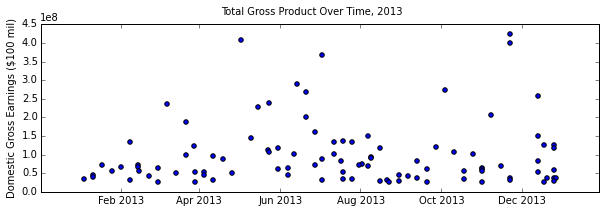

In [6]:
dtg = df['DomesticTotalGross'].as_matrix().tolist()
date = [datetime.strptime(str(i)[:10], '%Y-%m-%d') 
        for i in df['ReleaseDate'].as_matrix().tolist()] #ugly way to get dates but dat one liner ^_^
plt.figure(figsize=(10,3)).suptitle("Total Gross Product Over Time, 2013", fontsize='10')
plt.ylabel('Domestic Gross Earnings ($100 mil)', fontsize='10')
plt.scatter(date, dtg)

###Challenge 2

Plot runtime vs. domestic total gross.



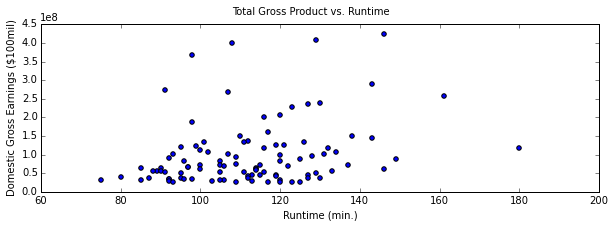

In [7]:
dtg = df['DomesticTotalGross'].as_matrix().tolist()
runtime = df['Runtime'].as_matrix().tolist()

# plotting code
plt.figure(figsize=(10,3)).suptitle("Total Gross Product vs. Runtime", fontsize='10')
plt.xlabel('Runtime (min.)', fontsize='10')
plt.ylabel('Domestic Gross Earnings ($100mil)', fontsize='10')
plt.scatter(runtime, dtg)

### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

 

In [8]:
rating_runtime = df.groupby(['Rating'])['Runtime'].mean()
rating_dtg = df.groupby(['Rating'])['DomesticTotalGross'].mean()
pprint(rating_runtime)
pprint(rating_dtg)

Rating
G         107.000000
PG         99.933333
PG-13     117.510638
R         110.729730
Name: Runtime, dtype: float64
Rating
G         268492764
PG        131135716
PG-13     111449769
R          69892429
Name: DomesticTotalGross, dtype: int64


### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

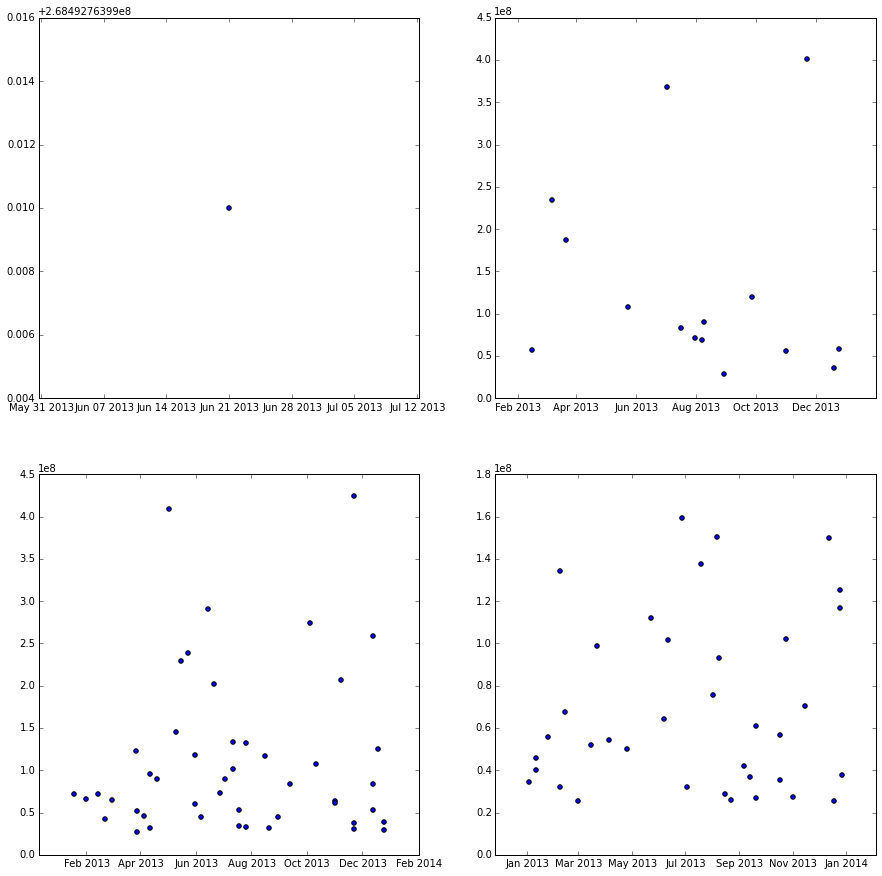

In [10]:
gdf = df[df['Rating']== 'G']
pgdf = df[df['Rating']== 'PG']
pg13df = df[df['Rating']== 'PG-13']
rdf = df[df['Rating']== 'R']

dflist = [gdf, pgdf, pg13df, rdf]
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
subax = [ax1, ax2, ax3, ax4]

for data, subplt in zip(dflist, subax):
    dtg = data['DomesticTotalGross'].as_matrix().tolist()
    date = [datetime.strptime(str(j)[:10], '%Y-%m-%d') 
            for j in data['ReleaseDate'].as_matrix().tolist()] #ugly way to get dates but dat one liner ^_^
    subplt.scatter(date, dtg)


### Challenge 5

What director in your dataset has the highest gross per movie?



In [26]:
print (df.groupby(['Director'])['DomesticTotalGross'].mean().idxmax(),
    df.groupby(['Director'])['DomesticTotalGross'].mean().max())# dat one liner

('Francis Lawrence', 424668047)


### Challenge 6

Bin your dataset into years (if applicable) and make a bar graph with error bars of gross each year.

<Container object of 3 artists>

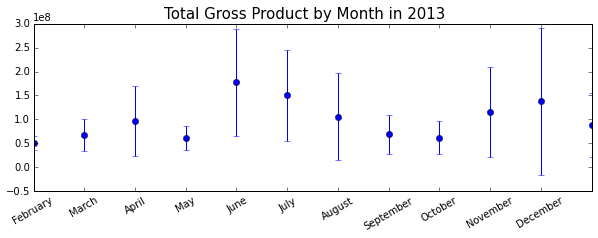

In [71]:
df['Month'] = [datetime.strptime(str(i)[5:7], '%m').month for i in df['ReleaseDate'].as_matrix().tolist()]
means = df.groupby(['Month'])['DomesticTotalGross'].mean().as_matrix().tolist()
months = df.groupby(['Month'])['DomesticTotalGross'].mean().index.values
stdevs = df.groupby(['Month'])['DomesticTotalGross'].std().as_matrix().tolist()
plt.figure(figsize=(10,3)).suptitle("Total Gross Product by Month in 2013", fontsize='15')
plt.xticks(range(len(months)), [calendar.month_name[i] for i in months], rotation=30)
plt.errorbar(months, means, stdevs, fmt='o')